In [1]:
import pandas as pd

In [2]:
from nltk.stem import PorterStemmer
from nltk.tokenize import word_tokenize
  
ps = PorterStemmer()

In [3]:
# unique unigrams related to crime
unigrams = ['shoplift',
            'shoplifter',
            'shoplifting',
            'theft',
            'thief',
            'thieving',
            'victim',
            'robbed',
            'robbery',
            'rape',
            'raped',
            'rapist',
            'murder',
            'murdered',
            'murderess',
            'manslaughter',
            'massacrer',
            'kill',
            'killer',
            'killing',
            'larceny',
            'loot',
            'aggravated',
            'threaten',
            'armed',
            'assaulted',
            'raider',
            'assailants',
            'assault',
            'killer',
            'robbery',
            'robberies',
            'bandit',
            'cadaver',
            'corpse',
            'jail',
            'cartel',
            'accomplice',
            'stolen',
            'smuggle',
'crime',
'offender',
'imprison',
'criminal',
'fraud',
'graffiti',
'armed',
'homicide',
'slaughter',
'safety',
'abuse',
'aggression',
'violent',
'attack',
'break-in',
'burglary',
'cartheft',
'dead', 'deadly'
'delinquent',
'delinquency',
'drug dealing',
'drugdealing',
'executioner',
'fatality',
'felon',
'felony',
'firearm',
'forty-five',
'gang',
'gangster',
'gun',
'gunowner',
'gunshot',
'gunshots',
'handgun',
'harass',
'harassment',
'heist',
'trespass',
'misdemeanor',
'misdeed',
'illegal',
'thirty-eight',
'violation',
'misconduct',
'lawbreaking',
'culpable',
'illicit',
'fugitive',
'mugging',
'strangle',
'constriction',
'police',
'torture',
'battery',
'casualty',
'culprit',
'pistol',
'narcs',
'perpetrator',
'prey',
'rifle',
'stalk',
'break', 'vandalism',
'mischief',
'damage',
'destroy',
'devastation',
'smash',
'wreck',
'malicious',
'pedophile',
            'arson',
            'pornography',
            'disorderly',
            'trafficking',
            'prostitution',
            'perjury',
            'marijuana',
            'assassination',
            'blackmail',
            'bombing',
            'bribery',
            'coercion',
            'counterfeiting',
            'terrorism',
            'shooting',
            'smuggling',
            'genocide',
            'hostage',
            'molest',
            'molestation',
            'misuse',
            'narcotics',
            'obstruction',
            'pirating',
            'tampering',
            'ransom',
            'sabotage',
            'fentanyl',
            'cannabis',
            'cocaine',
            'heroin',
            'ketamine',
            'lsd'
           ]

In [4]:
# list of stemmed unigrams
stemmed_unigrams = []
for w in unigrams:
    stemmed_unigrams.append(ps.stem(w))
stemmed_unigrams = list(set(stemmed_unigrams))

In [5]:
sf_tweets = pd.read_csv('sf_tweets.csv')

/opt/conda/lib/python3.9/site-packages/IPython/core/interactiveshell.py:3508: DtypeWarning: Columns (29,30,32,40,42,43,44,50,68) have mixed types.Specify dtype option on import or set low_memory=False.
  exec(code_obj, self.user_global_ns, self.user_ns)


In [6]:
from nltk.tokenize import RegexpTokenizer

tokenizer = RegexpTokenizer(r'\w+')
# ^removes punctuation from string

sf_tweets['tok_stem_tweet'] = sf_tweets['cleaned_tweet'].apply(lambda x: tokenizer.tokenize(ps.stem(x)))

In [7]:
# function for determining if word stemmed_unigrams is in a sentence
def crime_word(sentence):
    if any(word in sentence for word in stemmed_unigrams):
        return True
    else:
        return False

In [8]:
filter_indices = sf_tweets['tok_stem_tweet'].apply(lambda x: crime_word(x)).to_frame()

In [9]:
crime_tweet_indices = filter_indices.loc[filter_indices['tok_stem_tweet'] == True].index

In [10]:
crime_tweets = sf_tweets.iloc[crime_tweet_indices]
crime_tweets = crime_tweets.reset_index(drop = True)
crime_tweets

,Unnamed: 0,id,conversation_id,referenced_tweets.replied_to.id,referenced_tweets.retweeted.id,referenced_tweets.quoted.id,author_id,in_reply_to_user_id,in_reply_to_username,retweeted_user_id,...,__twarc.retrieved_at,__twarc.url,__twarc.version,cleaned_tweet,tweet_sentiment,cleaned_tweet_tok,neg_sent_score,neu_sent_score,pos_sent_score,tok_stem_tweet
0,0,1620243769579950082,1620243769579950082,NaN,1.620224e+18,NaN,62890739,NaN,NaN,2.555015e+09,...,2023-02-07T02:12:57+00:00,https://api.twitter.com/2/tweets/search/recent...,2.13.0,spent day tenderloin. talked lot people street...,0,"['spent', 'day', 'tenderloin', '.', 'talked', ...",0.128,0.780,0.092,"[spent, day, tenderloin, talked, lot, people, ..."
1,1,1620243883803410433,1620243883803410433,NaN,1.620224e+18,NaN,1604250897436987393,NaN,NaN,2.555015e+09,...,2023-02-07T02:12:57+00:00,https://api.twitter.com/2/tweets/search/recent...,2.13.0,spent day tenderloin. talked lot people street...,0,"['spent', 'day', 'tenderloin', '.', 'talked', ...",0.128,0.780,0.092,"[spent, day, tenderloin, talked, lot, people, ..."
2,2,1620243899116847105,1620243899116847105,NaN,1.620224e+18,NaN,873989847907614720,NaN,NaN,2.555015e+09,...,2023-02-07T02:12:57+00:00,https://api.twitter.com/2/tweets/search/recent...,2.13.0,spent day tenderloin. talked lot people street...,0,"['spent', 'day', 'tenderloin', '.', 'talked', ...",0.128,0.780,0.092,"[spent, day, tenderloin, talked, lot, people, ..."
3,3,1620244120223506438,1620244120223506438,NaN,NaN,NaN,1492637838969647104,NaN,NaN,NaN,...,2023-02-07T02:12:57+00:00,https://api.twitter.com/2/tweets/search/recent...,2.13.0,must hunt haunts him… haunts (ghost killer – b...,0,"['must', 'hunt', 'haunts', 'him…', 'haunts', '...",0.414,0.586,0.000,"[must, hunt, haunts, him, haunts, ghost, kille..."
4,8,1620244374411182080,1620244374411182080,NaN,1.620224e+18,NaN,1392346416471678977,NaN,NaN,2.555015e+09,...,2023-02-07T02:12:57+00:00,https://api.twitter.com/2/tweets/search/recent...,2.13.0,spent day tenderloin. talked lot people street...,0,"['spent', 'day', 'tenderloin', '.', 'talked', ...",0.128,0.780,0.092,"[spent, day, tenderloin, talked, lot, people, ..."
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
3302,66171,1648377314525466624,1648377314525466624,NaN,NaN,NaN,1604485680,7.402850e+17,NaN,NaN,...,2023-04-18T23:15:50+00:00,https://api.twitter.com/2/tweets/search/recent...,2.13.0,@sfpdchief william scott 33 🤷‍♂️🤔 people arres...,1,"['@', 'sfpdchief', 'william', 'scott', '33', '...",0.137,0.809,0.054,"[sfpdchief, william, scott, 33, people, arrest..."
3303,66199,1648388264129093634,1648388264129093634,NaN,NaN,NaN,1244142766851887104,NaN,NaN,NaN,...,2023-04-18T23:15:50+00:00,https://api.twitter.com/2/tweets/search/recent...,2.13.0,san francisco losing people left right. facing...,0,"['san', 'francisco', 'losing', 'people', 'left...",0.289,0.670,0.041,"[san, francisco, losing, people, left, right, ..."
3304,66245,1648406915909816322,1648406915909816322,NaN,1.648388e+18,NaN,18006842,NaN,NaN,1.244143e+18,...,2023-04-18T23:15:48+00:00,https://api.twitter.com/2/tweets/search/recent...,2.13.0,san francisco losing people left right. facing...,0,"['san', 'francisco', 'losing', 'people', 'left...",0.289,0.670,0.041,"[san, francisco, losing, people, left, right, ..."
3305,66274,1648416106367836165,1648416106367836165,NaN,NaN,NaN,1132825701822763009,NaN,NaN,NaN,...,2023-04-18T23:15:48+00:00,https://api.twitter.com/2/tweets/search/recent...,2.13.0,sexy killer! 👺\n\n#scream #screamvi #bayarea...,0,"['sexy', 'killer', '!', '👺\\n\\n', '#', 'screa...",0.135,0.765,0.100,"[sexy, killer, n, n, scream, screamvi, bayarea..."


In [11]:
# df for assigning kind of crime to specific words
word_crime_df = pd.read_csv('word crime types.csv')
word_crime_df = word_crime_df.rename(columns = {'WORD': 'word', 'CRIME TYPE' : 'crime type'})#.drop(columns = ['Unnamed:2'])
word_crime_df = word_crime_df.drop(['Unnamed: 2'], axis = 1)
word_crime_df

,word,crime type
0,shoplift,property crime
1,shoplifter,property crime
2,shoplifting,property crime
3,theft,property crime
4,thief,property crime
...,...,...
123,violence,violent crime
124,drugs,organised crime
125,punch,violent crime
126,homeless,violent crime


In [12]:
# stem the word column
for i in range(len(word_crime_df)):
    word_crime_df['word'][i]= ps.stem(word_crime_df['word'][i])

In [13]:
crime_tweets['tok_stem_tweet']

0       [spent, day, tenderloin, talked, lot, people, ...
1       [spent, day, tenderloin, talked, lot, people, ...
2       [spent, day, tenderloin, talked, lot, people, ...
3       [must, hunt, haunts, him, haunts, ghost, kille...
4       [spent, day, tenderloin, talked, lot, people, ...
                              ...                        
3302    [sfpdchief, william, scott, 33, people, arrest...
3303    [san, francisco, losing, people, left, right, ...
3304    [san, francisco, losing, people, left, right, ...
3305    [sexy, killer, n, n, scream, screamvi, bayarea...
3306    [preview, foot, fetish, shoot, more, n, n, toe...
Name: tok_stem_tweet, Length: 3307, dtype: object

In [14]:
crime_tweets

,Unnamed: 0,id,conversation_id,referenced_tweets.replied_to.id,referenced_tweets.retweeted.id,referenced_tweets.quoted.id,author_id,in_reply_to_user_id,in_reply_to_username,retweeted_user_id,...,__twarc.retrieved_at,__twarc.url,__twarc.version,cleaned_tweet,tweet_sentiment,cleaned_tweet_tok,neg_sent_score,neu_sent_score,pos_sent_score,tok_stem_tweet
0,0,1620243769579950082,1620243769579950082,NaN,1.620224e+18,NaN,62890739,NaN,NaN,2.555015e+09,...,2023-02-07T02:12:57+00:00,https://api.twitter.com/2/tweets/search/recent...,2.13.0,spent day tenderloin. talked lot people street...,0,"['spent', 'day', 'tenderloin', '.', 'talked', ...",0.128,0.780,0.092,"[spent, day, tenderloin, talked, lot, people, ..."
1,1,1620243883803410433,1620243883803410433,NaN,1.620224e+18,NaN,1604250897436987393,NaN,NaN,2.555015e+09,...,2023-02-07T02:12:57+00:00,https://api.twitter.com/2/tweets/search/recent...,2.13.0,spent day tenderloin. talked lot people street...,0,"['spent', 'day', 'tenderloin', '.', 'talked', ...",0.128,0.780,0.092,"[spent, day, tenderloin, talked, lot, people, ..."
2,2,1620243899116847105,1620243899116847105,NaN,1.620224e+18,NaN,873989847907614720,NaN,NaN,2.555015e+09,...,2023-02-07T02:12:57+00:00,https://api.twitter.com/2/tweets/search/recent...,2.13.0,spent day tenderloin. talked lot people street...,0,"['spent', 'day', 'tenderloin', '.', 'talked', ...",0.128,0.780,0.092,"[spent, day, tenderloin, talked, lot, people, ..."
3,3,1620244120223506438,1620244120223506438,NaN,NaN,NaN,1492637838969647104,NaN,NaN,NaN,...,2023-02-07T02:12:57+00:00,https://api.twitter.com/2/tweets/search/recent...,2.13.0,must hunt haunts him… haunts (ghost killer – b...,0,"['must', 'hunt', 'haunts', 'him…', 'haunts', '...",0.414,0.586,0.000,"[must, hunt, haunts, him, haunts, ghost, kille..."
4,8,1620244374411182080,1620244374411182080,NaN,1.620224e+18,NaN,1392346416471678977,NaN,NaN,2.555015e+09,...,2023-02-07T02:12:57+00:00,https://api.twitter.com/2/tweets/search/recent...,2.13.0,spent day tenderloin. talked lot people street...,0,"['spent', 'day', 'tenderloin', '.', 'talked', ...",0.128,0.780,0.092,"[spent, day, tenderloin, talked, lot, people, ..."
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
3302,66171,1648377314525466624,1648377314525466624,NaN,NaN,NaN,1604485680,7.402850e+17,NaN,NaN,...,2023-04-18T23:15:50+00:00,https://api.twitter.com/2/tweets/search/recent...,2.13.0,@sfpdchief william scott 33 🤷‍♂️🤔 people arres...,1,"['@', 'sfpdchief', 'william', 'scott', '33', '...",0.137,0.809,0.054,"[sfpdchief, william, scott, 33, people, arrest..."
3303,66199,1648388264129093634,1648388264129093634,NaN,NaN,NaN,1244142766851887104,NaN,NaN,NaN,...,2023-04-18T23:15:50+00:00,https://api.twitter.com/2/tweets/search/recent...,2.13.0,san francisco losing people left right. facing...,0,"['san', 'francisco', 'losing', 'people', 'left...",0.289,0.670,0.041,"[san, francisco, losing, people, left, right, ..."
3304,66245,1648406915909816322,1648406915909816322,NaN,1.648388e+18,NaN,18006842,NaN,NaN,1.244143e+18,...,2023-04-18T23:15:48+00:00,https://api.twitter.com/2/tweets/search/recent...,2.13.0,san francisco losing people left right. facing...,0,"['san', 'francisco', 'losing', 'people', 'left...",0.289,0.670,0.041,"[san, francisco, losing, people, left, right, ..."
3305,66274,1648416106367836165,1648416106367836165,NaN,NaN,NaN,1132825701822763009,NaN,NaN,NaN,...,2023-04-18T23:15:48+00:00,https://api.twitter.com/2/tweets/search/recent...,2.13.0,sexy killer! 👺\n\n#scream #screamvi #bayarea...,0,"['sexy', 'killer', '!', '👺\\n\\n', '#', 'screa...",0.135,0.765,0.100,"[sexy, killer, n, n, scream, screamvi, bayarea..."


In [15]:
crime_tweets

,Unnamed: 0,id,conversation_id,referenced_tweets.replied_to.id,referenced_tweets.retweeted.id,referenced_tweets.quoted.id,author_id,in_reply_to_user_id,in_reply_to_username,retweeted_user_id,...,__twarc.retrieved_at,__twarc.url,__twarc.version,cleaned_tweet,tweet_sentiment,cleaned_tweet_tok,neg_sent_score,neu_sent_score,pos_sent_score,tok_stem_tweet
0,0,1620243769579950082,1620243769579950082,NaN,1.620224e+18,NaN,62890739,NaN,NaN,2.555015e+09,...,2023-02-07T02:12:57+00:00,https://api.twitter.com/2/tweets/search/recent...,2.13.0,spent day tenderloin. talked lot people street...,0,"['spent', 'day', 'tenderloin', '.', 'talked', ...",0.128,0.780,0.092,"[spent, day, tenderloin, talked, lot, people, ..."
1,1,1620243883803410433,1620243883803410433,NaN,1.620224e+18,NaN,1604250897436987393,NaN,NaN,2.555015e+09,...,2023-02-07T02:12:57+00:00,https://api.twitter.com/2/tweets/search/recent...,2.13.0,spent day tenderloin. talked lot people street...,0,"['spent', 'day', 'tenderloin', '.', 'talked', ...",0.128,0.780,0.092,"[spent, day, tenderloin, talked, lot, people, ..."
2,2,1620243899116847105,1620243899116847105,NaN,1.620224e+18,NaN,873989847907614720,NaN,NaN,2.555015e+09,...,2023-02-07T02:12:57+00:00,https://api.twitter.com/2/tweets/search/recent...,2.13.0,spent day tenderloin. talked lot people street...,0,"['spent', 'day', 'tenderloin', '.', 'talked', ...",0.128,0.780,0.092,"[spent, day, tenderloin, talked, lot, people, ..."
3,3,1620244120223506438,1620244120223506438,NaN,NaN,NaN,1492637838969647104,NaN,NaN,NaN,...,2023-02-07T02:12:57+00:00,https://api.twitter.com/2/tweets/search/recent...,2.13.0,must hunt haunts him… haunts (ghost killer – b...,0,"['must', 'hunt', 'haunts', 'him…', 'haunts', '...",0.414,0.586,0.000,"[must, hunt, haunts, him, haunts, ghost, kille..."
4,8,1620244374411182080,1620244374411182080,NaN,1.620224e+18,NaN,1392346416471678977,NaN,NaN,2.555015e+09,...,2023-02-07T02:12:57+00:00,https://api.twitter.com/2/tweets/search/recent...,2.13.0,spent day tenderloin. talked lot people street...,0,"['spent', 'day', 'tenderloin', '.', 'talked', ...",0.128,0.780,0.092,"[spent, day, tenderloin, talked, lot, people, ..."
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
3302,66171,1648377314525466624,1648377314525466624,NaN,NaN,NaN,1604485680,7.402850e+17,NaN,NaN,...,2023-04-18T23:15:50+00:00,https://api.twitter.com/2/tweets/search/recent...,2.13.0,@sfpdchief william scott 33 🤷‍♂️🤔 people arres...,1,"['@', 'sfpdchief', 'william', 'scott', '33', '...",0.137,0.809,0.054,"[sfpdchief, william, scott, 33, people, arrest..."
3303,66199,1648388264129093634,1648388264129093634,NaN,NaN,NaN,1244142766851887104,NaN,NaN,NaN,...,2023-04-18T23:15:50+00:00,https://api.twitter.com/2/tweets/search/recent...,2.13.0,san francisco losing people left right. facing...,0,"['san', 'francisco', 'losing', 'people', 'left...",0.289,0.670,0.041,"[san, francisco, losing, people, left, right, ..."
3304,66245,1648406915909816322,1648406915909816322,NaN,1.648388e+18,NaN,18006842,NaN,NaN,1.244143e+18,...,2023-04-18T23:15:48+00:00,https://api.twitter.com/2/tweets/search/recent...,2.13.0,san francisco losing people left right. facing...,0,"['san', 'francisco', 'losing', 'people', 'left...",0.289,0.670,0.041,"[san, francisco, losing, people, left, right, ..."
3305,66274,1648416106367836165,1648416106367836165,NaN,NaN,NaN,1132825701822763009,NaN,NaN,NaN,...,2023-04-18T23:15:48+00:00,https://api.twitter.com/2/tweets/search/recent...,2.13.0,sexy killer! 👺\n\n#scream #screamvi #bayarea...,0,"['sexy', 'killer', '!', '👺\\n\\n', '#', 'screa...",0.135,0.765,0.100,"[sexy, killer, n, n, scream, screamvi, bayarea..."


In [20]:
crime_words = []
#crime_word_count = 0
for i in range(len(crime_tweets)):
    words = []
    word_count = 0
    for word in word_crime_df['word']:
        if word in crime_tweets['tok_stem_tweet'][i]:
            words.append(word)
            word_count += 1
    if word_count > 0:
        max_word = max(set(words), key=words.count)
        crime_words.append(max_word)
    # if all(word for word in word_crime_df['word']) not in crime_tweets['tok_stem_tweet'][i]:
    if word_count == 0:
        crime_words.append(None)

crime_tweets['crime word'] = crime_words

In [21]:
crime_words

['fentanyl',
 'fentanyl',
 'fentanyl',
 'killer',
 'fentanyl',
 'fentanyl',
 None,
 'fentanyl',
 'fentanyl',
 'fentanyl',
 None,
 'fentanyl',
 'attack',
 'fentanyl',
 'fentanyl',
 'fentanyl',
 'homeless',
 'fentanyl',
 'fentanyl',
 'fentanyl',
 'fentanyl',
 'assault',
 'fentanyl',
 'fentanyl',
 'fentanyl',
 'fentanyl',
 'fentanyl',
 'fentanyl',
 'fentanyl',
 'fentanyl',
 'fentanyl',
 'fentanyl',
 'fentanyl',
 'fentanyl',
 'fentanyl',
 'fentanyl',
 'fentanyl',
 'fentanyl',
 'fentanyl',
 'fentanyl',
 'fentanyl',
 'fentanyl',
 'fentanyl',
 'fentanyl',
 'fentanyl',
 'fentanyl',
 'fentanyl',
 'fentanyl',
 'fentanyl',
 None,
 'fentanyl',
 None,
 'fentanyl',
 'fentanyl',
 'fentanyl',
 'fentanyl',
 'fentanyl',
 'fentanyl',
 'fentanyl',
 'fentanyl',
 'fentanyl',
 'fentanyl',
 'fentanyl',
 'fraud',
 'fentanyl',
 'fentanyl',
 'fentanyl',
 'fentanyl',
 'fentanyl',
 'fentanyl',
 'fentanyl',
 'fentanyl',
 'fentanyl',
 'fentanyl',
 None,
 'fentanyl',
 'fentanyl',
 'gang',
 'fentanyl',
 'fentanyl',
 '

In [27]:
word_crime_df = word_crime_df.rename(columns = {'word': 'crime word'})

# merge the word_crime_df with the crime_tweets
    # gives us the crime associated with each tweet

In [28]:
crime_type_df = pd.merge(crime_tweets, word_crime_df, on = ['crime word'])
crime_type_df[['text', 'crime word', 'crime type']]
# assigns crime type to each tweet

,text,crime word,crime type
0,Spent the day in the Tenderloin. Talked to a l...,fentanyl,organised crime
1,Spent the day in the Tenderloin. Talked to a l...,fentanyl,organised crime
2,Spent the day in the Tenderloin. Talked to a l...,fentanyl,organised crime
3,Spent the day in the Tenderloin. Talked to a l...,fentanyl,organised crime
4,Spent the day in the Tenderloin. Talked to a l...,fentanyl,organised crime
...,...,...,...
3293,STRANGER THINGS X📖OF ELI\nConnor discovers tec...,raider,violent crime
3294,STRANGER THINGS X📖OF ELI\nConnor discovers tec...,raider,violent crime
3295,STRANGER THINGS X📖OF ELI\nConnor discovers tec...,raider,violent crime
3296,STRANGER THINGS X📖OF ELI\nConnor discovers tec...,raider,violent crime


In [29]:
crime_type_df.to_csv('crime_type_df.csv')

In [30]:
crime_type_df = pd.read_csv('crime_type_df.csv')

In [33]:
crime_type_df[['cleaned_tweet', 'crime word', 'crime type']].drop_duplicates()

,cleaned_tweet,crime word,crime type
0,spent day tenderloin. talked lot people street...,fentanyl,organised crime
5,#sanfrancisco studied like ecosystem #woke #cl...,fentanyl,organised crime
17,want truth fentanyl street? walk city @samquin...,fentanyl,organised crime
71,@sfchronicle mask taking oding fentanyl disint...,fentanyl,organised crime
109,want thank @varneyco &amp; @foxnews reporting ...,fentanyl,organised crime
...,...,...,...
3275,#ya imperator furiosa making\n\nwhen enemy bla...,arm,armed activity
3285,#la &amp; #sf: shoot shot! you’d lucky arm can...,arm,armed activity
3287,@pt change fact san francisco &amp; california...,offend,violent crime
3288,tomb raider space\n\nlexa's skills include:\n-...,raider,violent crime


In [35]:
crime_type_df['created_at'] = crime_type_df['created_at'].apply(lambda x: pd.to_datetime(x))

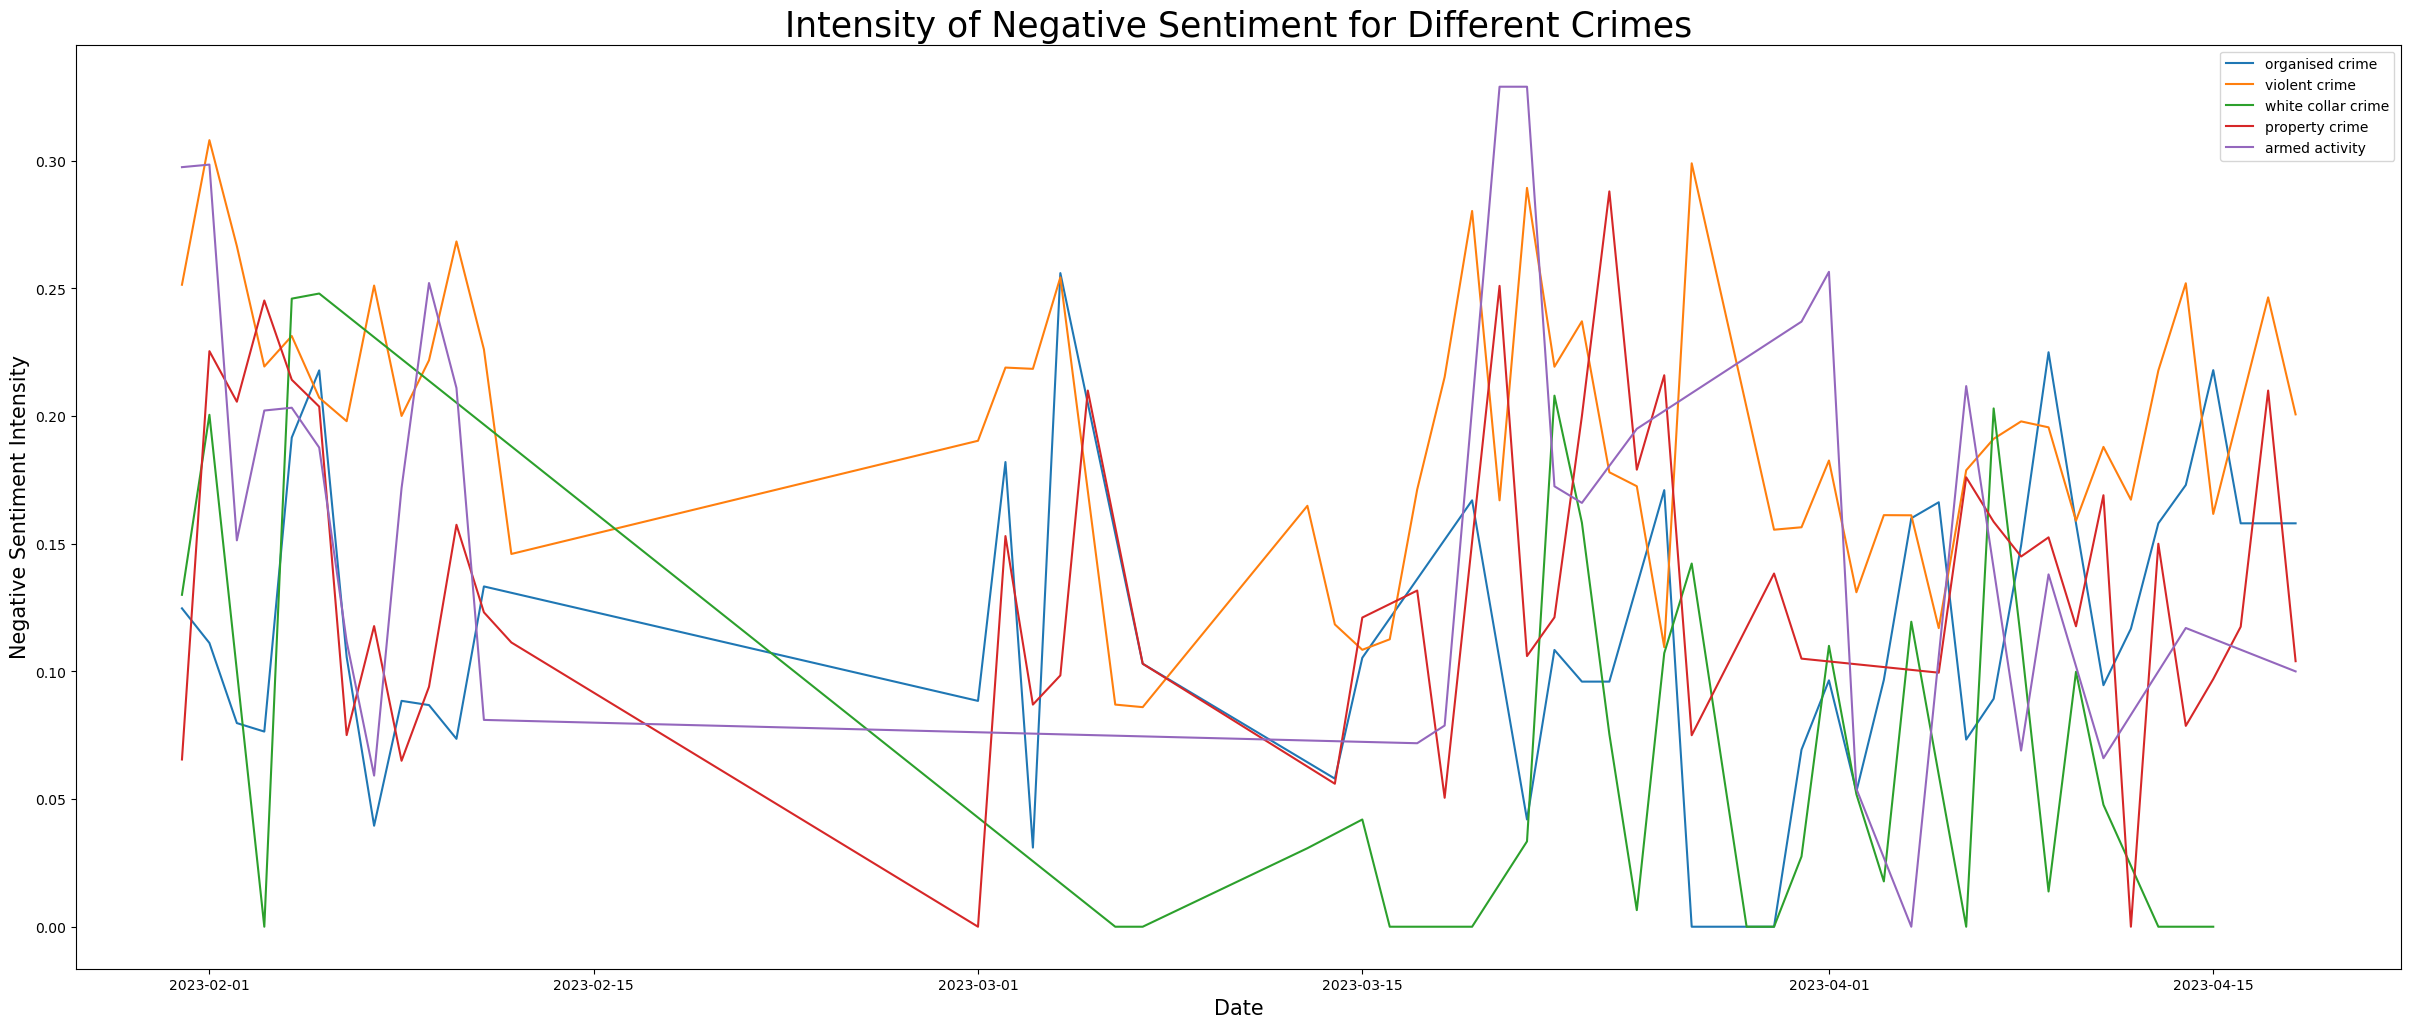

In [36]:
import matplotlib.pyplot as plt
import seaborn as sns
fig, ax = plt.subplots()
plot = sns.lineplot(data=crime_type_df, x="created_at", y="neg_sent_score", hue="crime type", ci=None)
fig.set_size_inches(30, 12)
plot.legend(fontsize = 10)
plt.xlabel('Date', fontsize = 15); # binned by day
plt.ylabel('Negative Sentiment Intensity', fontsize = 15);
plt.title('Intensity of Negative Sentiment for Different Crimes', fontsize = 25);